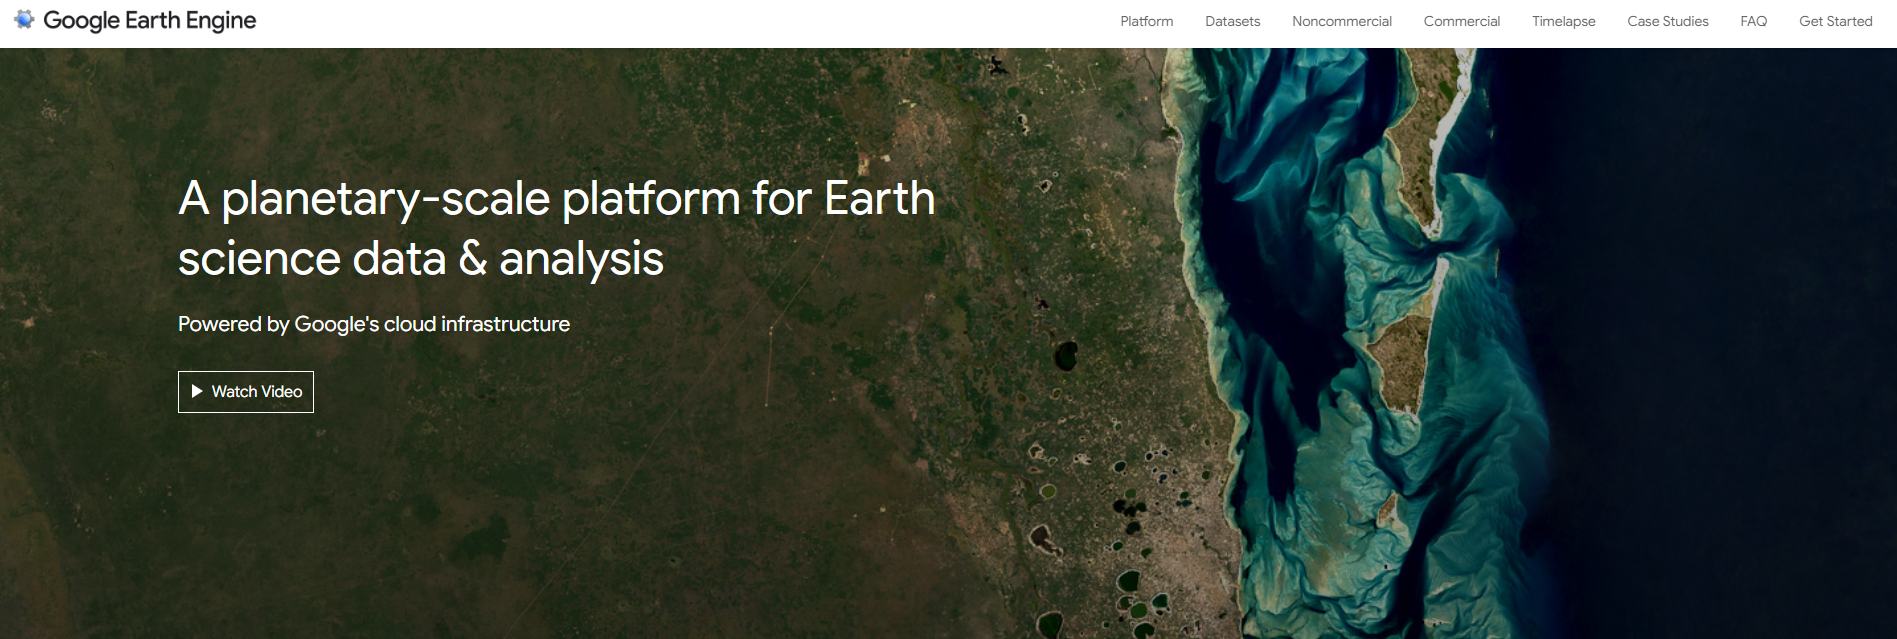



---


#  🟢 Como Inicializar o Google Earth Engine, Montar Drive e Começar com Mapa Simples do Geemap.


---
1. Possuir um e-mail do Gmail.
2. Abrir uma [conta](https://earthengine.google.com/) no Google Earth Engine (GEE) e criar o seu ID project. Acessar [vídeo](https://www.youtube.com/watch?v=RuKTG0rHHSw&t=6s) explicando como criar uma conta no GEE e como criar o ID project.




---
**REALIZAÇÃO**:


- Realizado por: Enrique V. Mattos - 02/10/2025
- E-mail: enrique@unifei.edu.br
- GitHub: https://github.com/evmpython
- Lattes: http://lattes.cnpq.br/8010078550088178



---

# **1° Passo:** Inicializando o GEE



---
O Google Earth Engine (GEE) é uma plataforma poderosa para análise geoespacial em larga escala. O primeiro passo para começarmos a trabalhar com o GEE é autenticarmos e inicializarmos o GEE. Este procedimento irá nos permitir ter acesso ao banco de dados e a todas as funcionalidades do GEE.

Primeiro importaremos as bibliotecas GEE e geemap, e em seguida iremos autenticar e inicializar o GEE através do geemap. Explicando em maiores detalhes, realizaremos os seguintes comandos:


---


1. Importação das Bibliotecas Principais: `import ee /
import geemap`

    - `ee`: Módulo principal do Google Earth Engine, que fornece acesso aos dados e funcionalidades de processamento geoespacial.

    - `geemap`: Biblioteca que estende o GEE com ferramentas de visualização interativa, especialmente útil em notebooks Jupyter/Colab.


---


2. Inicialização do Google Earth Engine:  `geemap.ee_initialize(project='ee-enrique', opt_url='https://earthengine-highvolume.googleapis.com')`

    - `geemap.ee_initialize()`: Função que autentica e inicializa a sessão do GEE.

    - `project='ee-enrique'` (opcional): Define o projeto GEE a ser usado (substitua pelo nome do seu projeto).

     - `opt_url`: Especifica o endpoint da API do GEE. Neste caso, usa-se um servidor de alto volume (highvolume) para processamento pesado.


---


Se você tiver uma conta do Earth Engine você poderá encontrar a sua ID de um projeto do GEE acessando https://code.earthengine.google.com/ com sua conta google, e depois verificando do lado superior direito do Code Editor o nome da sua ID.

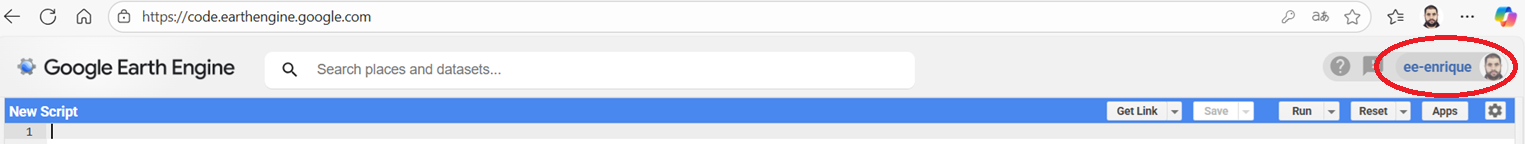

Insira a sua ID no campo `geemap.ee_initialize(project='SUA ID')`.

In [ ]:
# importando o GEE e Geemap
import ee
import geemap

# inicializando GEE
geemap.ee_initialize(project='ee-enrique', opt_url='https://earthengine-highvolume.googleapis.com')

# **2° Passo:** Montando Drive

In [ ]:
# monta drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# INSIRA O CAMINHO DO SEU DRIVE ONDE ESTÁ O CÓDIGO
dir = '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/MMC59 - DESASTRES NATURAIS /AULAS/AULA_PRATICA_GEE'

In [ ]:
# cria pasta de saída
import os
os.makedirs(f'{dir}/output', exist_ok=True)

# **3° Passo:** Mapas Interativos com Geemap


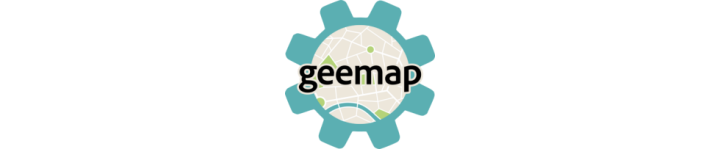

Agora que o nosso acesso ao Google Earth Engine está validado, podemos explorar todo o catálogo do Earth Engine.

Nós vamos fazer isso com uso do pacote [`geemap`](https://geemap.org/). O geemap é um excelente pacote de mapeamento interativo com a API Python para Earth Engine criado em 2020 pelo [Dr. Qiusheng Wu](https://faculty.utk.edu/Qiusheng.Wu), professor do Departamento de Geografia da Universidade de Tennessee. Uma explicação detalhada do Geemap e alguns vídeos clicar [aqui](https://www.youtube.com/watch?v=swjQEE5jpgE&list=PLAxJ4-o7ZoPccOFv1dCwvGI6TYnirRTg3) e [aqui](https://medium.com/@geonextgis/getting-started-with-geemap-a-guide-to-working-with-feature-and-image-collections-dfa438d59621).



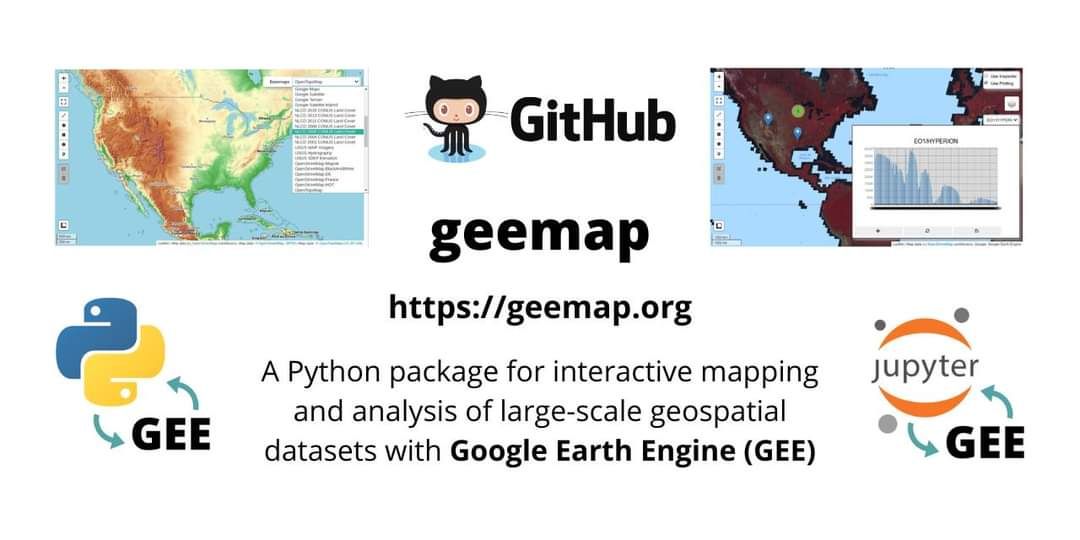

A biblioteca geemap já vem por padrão instalada no Google Colab, então não precisaremos instalá-la na nossa sessão do Colab. Iremos primeiro verificar qual versão do geemap esta atualmente instalada no Colab. Para isto usaremos o comando `!pip show geemap`.

In [ ]:
# verificando a versão do geemap disponível no Google Colab
!pip show geemap

Criando um mapa interativo básico. O geemap tem um objeto chamado `Map()` que é utilizado para criar os mapas interativos.

In [ ]:
# mostra o mapa interativo global
Map = geemap.Map()
Map

Mude a altura e largura do mapa interativo

In [ ]:
Map = geemap.Map(height="400pt", width="600pt")
Map

Muita das vezes é interessante deixarmos nosso mapa mais bonito, através da adição de algum mapa de fundo no nosso mapa interativo. O geemap possui diversas opções de mapas de fundo. Assim vamos verificar os mapas disponíveis no catálogo do GEE, através da função do geemap chamada `basemaps`.

In [ ]:
# imprimindo a lista de basemaps
basemaps = geemap.basemaps
for basemap in basemaps:
    print(basemap)

Iremos mostrar como exemplo o basemap `Esri.WorldImagery`. Para isto utilizaremos a função `add_basemap()`.

In [ ]:
# criando mapa interativo
Map = geemap.Map()

# adicionando basemap
Map.add_basemap(basemap = 'Esri.WorldImagery')

# exibe na tela
Map

Centralizando o mapa no Brasil. Para isto utilizaremos os argumentos `center` e o `zoom` dentro de **geemap.Map**.
- `center`: Recebe uma lista com [latitude, longitude]

- `zoom`: Nível de zoom (geralmente entre 1-20, onde valores maiores significam zoom mais próximo)

In [ ]:
# cria o mapa com centro nas coordenadas latitude=-14 graus e longitude=-55 graus e zoom inicial=4
Map = geemap.Map(center=[-14, -55], zoom=4)

# adicionando basemap
Map.add_basemap('Esri.WorldImagery')

# exibe na tela
Map

Quando trabalhamos com mapas interativos é interessante mostrarmos o contorno de uma região, como por exemplo o contorno de um país, Estado ou município. Assim, conseguimos dar enfâse na região de interesse.

O GEE tem uma base de dados dos contornos dos países para o mundo todo. Esta base de dados é uma Feature Collection de [nível 0](https://developers.google.com/earth-engine/datasets/catalog/FAO_GAUL_2015_level0). Precisaremos informar na FeatureCollection o **Earth Engine Snippet**, como `"FAO/GAUL/2015/level0"`.

Em seguida, para selecionar um país em específico utilizaremos o comando `Filter` e iremos inserir o nome do país (sem acentos e em inglês). Neste exemplo queremos analisar o Brasil, assim iremos inserir o nome `Brazil`.

In [ ]:
# carregando os contornos de todos os países do mundo
paises = ee.FeatureCollection('FAO/GAUL/2015/level0')

In [ ]:
# mostrando as informações dos 5 primeiros países da featurecollection
paises.limit(5)

In [ ]:
# selecionando o contorno do Brasil
brasil = paises.filter(ee.Filter.eq('ADM0_NAME', 'Brazil'))

In [ ]:
# mostrando as propriedades do contorno do Brasil
brasil

Iremos adicionar o contorno do Brasil através da função do geemap chamada `Map.addLayer()`. Como argumento inseriremos a variável **brazil** e definiremos o estilo do contorno e o nome da legenda.

Além disso, nesse mapa iremos usar a função `centerObject()` para centrar o mapa no Brasil e aplicaremos um zoom de valor 4.

In [ ]:
# criando mapa interativo
Map = geemap.Map()

# centra o mapa na região
Map.centerObject(brasil, zoom=4)

# adicionando basemap
Map.add_basemap('Esri.WorldImagery')

# contorno de itajuba
style = {'color': 'yellow', 'fillColor': '00000000'}
Map.addLayer(brasil.style(**style), {}, 'Brasil')

# exibe na tela
Map

Vamos aplicar uma metodologia semelhante ao utilizado anteriormente, só que agora para escolher o contorno por Estado. No caso, iremos escolher o Estado do `Rio Grande do Sul (RS)`. Os contornos dos Estados estão armazenados nos dados de level 1.

O GEE também possui uma base de dados dos Estados. Esta base de dados é uma Feature Collection de [nível 1](https://developers.google.com/earth-engine/datasets/catalog/FAO_GAUL_2015_level1). Precisaremos informar na **FeatureCollection** o Earth Engine Snippet, como `"FAO/GAUL/2015/level1"`.


Para selecionar um Estado em específico utilizaremos o comando `Filter` e iremos inserir o nome do Estado (sem acentos). Neste exemplo queremos analisar o Estado do Rio Grande do Sul (RS). Então iremos inserir o nome `Rio Grande Do Sul`.

In [ ]:
# selecionando o contorno do Estado do Rio Grande do Sul
rs = ee.FeatureCollection('FAO/GAUL/2015/level1').filter(ee.Filter.eq('ADM1_NAME', 'Rio Grande Do Sul'))
rs

In [ ]:
# criando mapa interativo
Map = geemap.Map()

# centra o mapa na região
Map.centerObject(rs, 6)

# adicionando basemap
Map.add_basemap('SATELLITE')

# contorno de MG
style = {'color': 'yellow', 'fillColor': '00000000'}
Map.addLayer(rs.style(**style), {}, 'MG')

# exibe na tela
Map

O GEE também possui uma base de dados dos contornos dos municípios para o mundo todo. Esta base de dados é uma Feature Collection de [nível 2](https://developers.google.com/earth-engine/datasets/catalog/FAO_GAUL_2015_level2). Precisaremos informar na **FeatureCollection** o Earth Engine Snippet, como `"FAO/GAUL/2015/level2"`.


Para selecionar um município em específico utilizaremos o comando `Filter` e iremos inserir o nome do município (sem acentos). Neste exemplo queremos analisar o município de Porto Alegre (RS). Então iremos inserir o nome `Porto Alegre`.

In [ ]:
# carrega os municípios a nível global
municipios_global = ee.FeatureCollection('FAO/GAUL/2015/level2')
municipios_global

In [ ]:
# seleciona o município de "Porto Alegre (RS)"
porto_alegre = municipios_global.filter(ee.Filter.eq('ADM2_NAME', 'Porto Alegre'))
porto_alegre

Iremos utilizar a função `centerObject` para centralizar nosso mapa no município de Porto Alegre. Como argumento iremos inserir a *FeatureCollection* do município de Porto Alegre e aplicar um zoom de valor 10. Além disso, iremos utilizar a função `addLayer` para plotar o contorno de Porto Alegre no mapa.

In [ ]:
# criando um mapa interativo
Map = geemap.Map()

# centra o mapa na região
Map.centerObject(porto_alegre, zoom=10)

# adicionando basemap
Map.add_basemap('Esri.WorldImagery')

# contorno de Porto Alegre
style = {'color': 'yellow', 'fillColor': '00000000'}
Map.addLayer(porto_alegre.style(**style), {}, 'itajuba')

# exibe na tela
Map